# 시계열 데이터 처리

- 파이썬의 내장함수 datetime

In [1]:
from datetime import datetime

In [3]:
now = datetime.now()
now

datetime.datetime(2020, 4, 29, 14, 26, 23, 556571)

In [7]:
now.year, now.month, now.day, now.weekday(), now.date()

(2020, 4, 29, 2, datetime.date(2020, 4, 29))

In [8]:
datetime(2020,4,29)

datetime.datetime(2020, 4, 29, 0, 0)

- datetime
- date
- time

In [9]:
now

datetime.datetime(2020, 4, 29, 14, 26, 23, 556571)

In [10]:
print('%s' % now)

2020-04-29 14:26:23.556571


- strftime() : 날자를 출력한다

In [11]:
now.strftime('%Y/%m/%d')

'2020/04/29'

- strptime() : 날자를 만들어준다

In [13]:
datetime.strptime('2020/1/1', '%Y/%m/%d')

datetime.datetime(2020, 1, 1, 0, 0)

In [15]:
datetime.strptime('2020/1/1 14:22:11', '%Y/%m/%d %H:%M:%S')

datetime.datetime(2020, 1, 1, 14, 22, 11)

- 요일/달 이름 출력

In [17]:
now.strftime('%w: %a(%A)')

'3: Wed(Wednesday)'

In [18]:
now.strftime('%m: %b(%B)')

'04: Apr(April)'

In [19]:
now = datetime.now()

In [20]:
요일 = ['월','화','수','목','금','토','일']
요일[now.weekday()]

'수'

- 리스트를 날자로 변환

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
l = [['2020/1/1', 111], ['2020/1/2', 222], ['2020/1/3', 333]]

In [28]:
df = pd.DataFrame(l, columns=['날자','값'])
df

,날자,값
0,2020/1/1,111
1,2020/1/2,222
2,2020/1/3,333


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
날자    3 non-null object
값     3 non-null int64
dtypes: int64(1), object(1)
memory usage: 128.0+ bytes


In [29]:
pd.to_datetime(df.날자)

0   2020-01-01
1   2020-01-02
2   2020-01-03
Name: 날자, dtype: datetime64[ns]

In [30]:
df['날자2'] = pd.to_datetime(df.날자)
df

,날자,값,날자2
0,2020/1/1,111,2020-01-01
1,2020/1/2,222,2020-01-02
2,2020/1/3,333,2020-01-03


In [69]:
l = [[202001011322, 111], [202001021533, 222], [202001032020, 333]]

In [70]:
df = pd.DataFrame(l, columns=['날자','값'])
df

,날자,값
0,202001011322,111
1,202001021533,222
2,202001032020,333


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
날자    3 non-null int64
값     3 non-null int64
dtypes: int64(2)
memory usage: 128.0 bytes


In [44]:
df['날자2'] = pd.to_datetime(df.날자, format='%Y%m%d%H%M')
df

,날자,값,날자2
0,202001011322,111,2020-01-01 13:22:00
1,202001021533,222,2020-01-02 15:33:00
2,202001032020,333,2020-01-03 20:20:00


- CSV 파일에서 날자 읽기

In [75]:
df = pd.read_csv('day.csv') # encoding='utf-8' , encoding='cp949'

In [76]:
df

,날자,값
0,200101,1
1,200201,2
2,200301,3


In [47]:
pd.to_datetime(df.날자, format='%y%m%d')

0   2020-01-01
1   2020-02-01
2   2020-03-01
Name: 날자, dtype: datetime64[ns]

In [48]:
df['날자2'] = pd.to_datetime(df.날자, format='%y%m%d')
df

,날자,값,날자2
0,200101,1,2020-01-01
1,200201,2,2020-02-01
2,200301,3,2020-03-01


In [50]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=None, compact_ints=None, use_unsigned=None, low_memory=True, buffer_lines=None, memory_map=False, float_precision=None)


In [60]:
df = pd.read_csv('day2.csv', parse_dates=[0]) # encoding='utf-8' , encoding='cp949'

In [61]:
df

,날자,값
0,2020-01-01,1
1,2020-02-01,2
2,2020-03-01,3


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
날자    3 non-null datetime64[ns]
값     3 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 128.0 bytes


In [66]:
df = pd.read_csv('day3.csv', parse_dates=[[0,1,2]], keep_date_col=True)

In [67]:
df

,년_월_일,년,월,일,값
0,2020-01-01,2020,1,1,1
1,2020-02-01,2020,2,1,2
2,2020-03-01,2020,3,1,3


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
년_월_일    3 non-null datetime64[ns]
년        3 non-null object
월        3 non-null object
일        3 non-null object
값        3 non-null int64
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 200.0+ bytes


In [84]:
l = [['2020',1,1,1000], ['2020',2,1,2000], ['2020',3,1,3000]]
df = pd.DataFrame(l, columns=['년','월','일','값'])
df

,년,월,일,값
0,2020,1,1,1000
1,2020,2,1,2000
2,2020,3,1,3000


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
년    3 non-null object
월    3 non-null int64
일    3 non-null int64
값    3 non-null int64
dtypes: int64(3), object(1)
memory usage: 176.0+ bytes


In [89]:
df.년.astype('int')*10000 + df.월*100 + df.일

0    20200101
1    20200201
2    20200301
dtype: int64

In [92]:
df['일자2'] = pd.to_datetime(df.년.astype('int')*10000 + df.월*100 + df.일, format='%Y%m%d')
df

,년,월,일,값,일자2
0,2020,1,1,1000,2020-01-01
1,2020,2,1,2000,2020-02-01
2,2020,3,1,3000,2020-03-01


- date_range() : 연속된 날자를 만든다

In [95]:
days = pd.date_range('2020/1/1', '2020/4/29')
days

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23',
               '2020-04-24', '2020-04-25', '2020-04-26', '2020-04-27',
               '2020-04-28', '2020-04-29'],
              dtype='datetime64[ns]', length=120, freq='D')

In [96]:
len(days)

120

In [98]:
pd.date_range('2020/1/1', periods=10)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [101]:
pd.date_range('2020/1/1', periods=12, freq='M')

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')

- 날자 오프셋

In [106]:
from pandas.tseries.offsets import Hour, Minute, MonthEnd

In [104]:
pd.to_datetime('2020/1/1 23:22') + Hour(1)

Timestamp('2020-01-02 00:22:00')

In [107]:
pd.to_datetime('2020/4/29') + MonthEnd()

Timestamp('2020-04-30 00:00:00')

- resample() : 시간대를 묶는다

In [111]:
df = pd.DataFrame({'col1': np.random.randint(10, size=100),
                  'col2': np.random.randn(100)},
                 index=pd.date_range('2020/1/1', periods=100))
df

,col1,col2
2020-01-01,4,-0.552692
2020-01-02,9,0.249297
2020-01-03,3,-1.423529
2020-01-04,8,0.728222
2020-01-05,9,1.675523
2020-01-06,6,-0.017527
2020-01-07,3,-0.240061
2020-01-08,6,1.386823
2020-01-09,9,0.372342
2020-01-10,0,-0.029584


In [115]:
df.resample('M')['col1','col2'].sum()

,col1,col2
2020-01-31,152,1.246920
2020-02-29,124,-5.183558
2020-03-31,145,-9.458139
2020-04-30,38,5.897857


In [116]:
df

,col1,col2
2020-01-01,4,-0.552692
2020-01-02,9,0.249297
2020-01-03,3,-1.423529
2020-01-04,8,0.728222
2020-01-05,9,1.675523
2020-01-06,6,-0.017527
2020-01-07,3,-0.240061
2020-01-08,6,1.386823
2020-01-09,9,0.372342
2020-01-10,0,-0.029584


In [125]:
df2 = df.reset_index()
df2.columns=['날자','col1','col2']
df2

,날자,col1,col2
0,2020-01-01,4,-0.552692
1,2020-01-02,9,0.249297
2,2020-01-03,3,-1.423529
3,2020-01-04,8,0.728222
4,2020-01-05,9,1.675523
5,2020-01-06,6,-0.017527
6,2020-01-07,3,-0.240061
7,2020-01-08,6,1.386823
8,2020-01-09,9,0.372342
9,2020-01-10,0,-0.029584


In [128]:
df2.resample('M', on='날자').col1.sum()

날자
2020-01-31    152
2020-02-29    124
2020-03-31    145
2020-04-30     38
Freq: M, Name: col1, dtype: int32

- rolling() : 이동평균선

In [129]:
df

,col1,col2
2020-01-01,4,-0.552692
2020-01-02,9,0.249297
2020-01-03,3,-1.423529
2020-01-04,8,0.728222
2020-01-05,9,1.675523
2020-01-06,6,-0.017527
2020-01-07,3,-0.240061
2020-01-08,6,1.386823
2020-01-09,9,0.372342
2020-01-10,0,-0.029584


In [131]:
df.col1.rolling(5).mean()

2020-01-01    NaN
2020-01-02    NaN
2020-01-03    NaN
2020-01-04    NaN
2020-01-05    6.6
2020-01-06    7.0
2020-01-07    5.8
2020-01-08    6.4
2020-01-09    6.6
2020-01-10    4.8
2020-01-11    3.8
2020-01-12    4.6
2020-01-13    4.2
2020-01-14    4.2
2020-01-15    4.8
2020-01-16    4.6
2020-01-17    4.8
2020-01-18    4.8
2020-01-19    3.4
2020-01-20    3.8
2020-01-21    4.2
2020-01-22    3.6
2020-01-23    3.8
2020-01-24    3.4
2020-01-25    3.4
2020-01-26    4.2
2020-01-27    5.0
2020-01-28    4.4
2020-01-29    6.2
2020-01-30    6.4
             ... 
2020-03-11    6.8
2020-03-12    6.8
2020-03-13    7.2
2020-03-14    5.8
2020-03-15    5.4
2020-03-16    4.8
2020-03-17    4.0
2020-03-18    4.4
2020-03-19    5.2
2020-03-20    3.8
2020-03-21    3.6
2020-03-22    3.0
2020-03-23    1.4
2020-03-24    0.8
2020-03-25    2.6
2020-03-26    3.4
2020-03-27    3.2
2020-03-28    3.4
2020-03-29    4.0
2020-03-30    2.6
2020-03-31    3.2
2020-04-01    4.2
2020-04-02    4.4
2020-04-03    3.2
2020-04-04

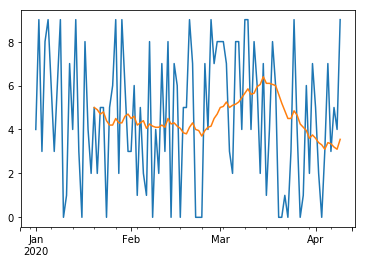

In [134]:
df.col1.plot()
df.col1.rolling(20).mean().plot()